# Lab 4 Report

Seth Richards and Anup Paudel

In [49]:
# import cell

import numpy as np
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

## Summary

In this lab, we find correlation values between signals with convolutions, finding the value at the index equal to the lengths of the original signals. Then, we find the correlation of signals with the unit step and it's opposite, which we later use to correlate against given signals with noise which is then translated from binary into characters (with an online translator).

# Assignment 1: Convolution of Two Signals

In [2]:
def u(t):
    return 1 * (t>0)

def delta(t,fs):
    return fs * np.concatenate([[0],np.diff(u(t))])

In [3]:
#A1

# Part 1

fs = 8000
ep = 1/fs
t=np.arange(0,1 + ep,1/fs)

x1 = u(t) - u(t-1)
x0 = -x1

In [4]:
# Part 2

y0 = np.convolve(x1,x0)/fs
y1 = np.convolve(x1,x1)/fs

In [5]:
# Part 3

ty = np.arange(0,len(y0) / fs,1/fs)

<IPython.core.display.Javascript object>


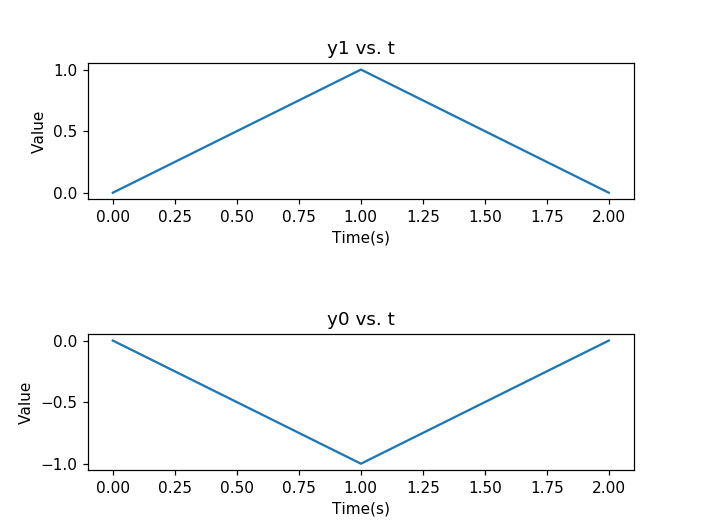

Text(0, 0.5, 'Value')

In [42]:
# Part 4

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('y1 vs. t')
plt.plot(ty,y1)
plt.xlabel('Time(s)')
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.title('y0 vs. t')
plt.plot(ty,y0)
plt.xlabel('Time(s)')
plt.ylabel('Value')

### Discussion

By the communative property of the convolution, the order of the convolution doesn't matter, as the integral returns the same result.


## Assignment 2 : Convolution and Correlation 

In [9]:
#A2

# Part 1

# extracts the correlation from signal x1 and x2, of d length and sampling rate fs
def correlationValue(x1,x2,d,fs):
    
    s = 0
    y1 = np.convolve(x1,x2)/fs
    s = y1[d * fs + 1]
    
    return s

In [12]:
# Part 2

y1corr = correlationValue(x1,x1,1,fs)
print("y1corr = ",y1corr)

y1corr =  1.0


In [13]:
# Part 4

y0corr = correlationValue(x1,x0,1,fs)
print("y0corr = ",y0corr)

y0corr =  -1.0


In [73]:
# Part 5

noise = np.random.normal(0,10,len(x1))
r = x1 + noise
tr = np.arange(0,len(r) / fs,1/fs)


In [74]:
# Part 6

yr1 = np.convolve(r,x1)/fs
yr0 = np.convolve(r,x0)/fs

tyr = np.arange(0,len(yr1) / fs,1/fs)


In [75]:
# Part 7

newy1corr = correlationValue(r,x1,1,fs)
newy0corr = correlationValue(r,x0,1,fs)

print("y1corr with noise = ",newy1corr)
print("y0corr with noise = ",newy0corr)

y1corr with noise =  0.9201967193540602
y0corr with noise =  -0.9201967193540602


<IPython.core.display.Javascript object>


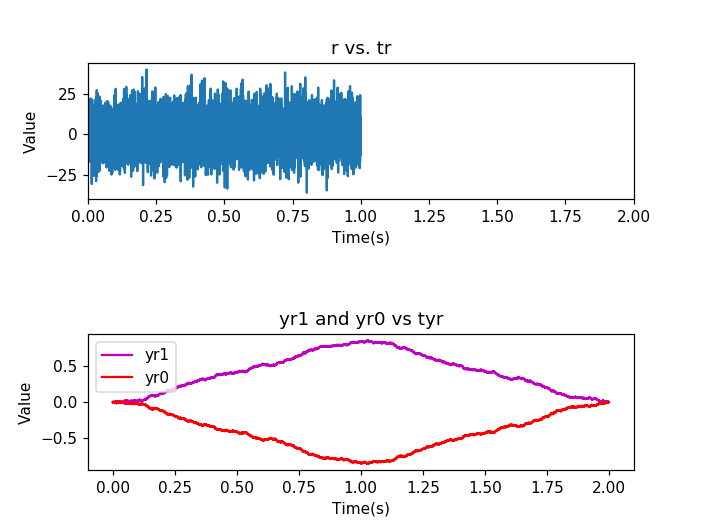

In [39]:
# Part 8

fig1 = plt.figure(2)
fig1.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('r vs. tr')
plt.xlim(0,2)
plt.plot(tr,r)
plt.xlabel('Time(s)')
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.title('yr1 and yr0 vs tyr')

plt.plot(tyr,yr1,'m',label = 'yr1')
plt.plot(tyr,yr0,'r',label = 'yr0')
plt.xlabel('Time(s)')
plt.ylabel('Value')
plt.legend(loc="upper left")

### Discussion

The correlation of the given signal should be closer to one than that of the box signal because the new x0 is more similar to the same x1 (or should we say less different) than to the old x0.

## Assignment 3 : Correlation and Signal Decoding

In [46]:
#A3

# Part 1

def decode(x,fs,x0,x1):
    
    s = 0
    y0 = np.convolve(x,x0)/fs
    y1 = np.convolve(x,x1)/fs
    if (y1[fs + 1] > y0[fs + 1]):
        s = 1
    
    return s

In [48]:
# Part 2

s1 = decode(x1,fs,x0,x1) # x1 is more similar to x1
s0 = decode(x0,fs,x0,x1) # x0 is more similar to x0

print("s1 = ",s1)
print("s0 = ",s0)

s1 =  1
s0 =  0


## Assignment 4 : Decipher Received Message in Digital Communication System

In [57]:
#A4

# Part 1
file = open('receivedmsg.csv','rb')
rm = np.loadtxt(file, delimiter=',')

In [100]:
# Part 2
rm_rows = rm.shape[0]
rm_columns = rm.shape[1]
message_bits = np.zeros([rm_rows,1])

for i in range(0,rm_rows):
    message_bits[i] = decode(rm[i,:],fs,x0,x1)

In [99]:
# Part 3
stringArray = np.zeros(88)
for i in range(0,message_bits.shape[0]):
    stringArray[i] = message_bits[i,0]
    
string = ""
for i in range(0,88):
    if (stringArray[i] == 1):
        string = string + "1"
    else:
        string = string + "0"
        
print(string) # prints out Go Huskies!

0100011101101111001000000100100001110101011100110110101101101001011001010111001100100001


### Discussion

When used with a binary to character translator, the string says "Go Huskies!".
